# Assigment : Image rotation by the use of transformation matrix.

## Narin K. Bannasan, Telecommunication Engineering, 59010728

### 1. Inclusions of libraries.

In [1]:
import cv2
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### 2. Image from random generation for a specified size.

In [2]:
# # Specify the image size.
# image_size = [100,200]
# #==============================================================
# image = np.zeros([image_size[0],image_size[1]],dtype=np.uint8)
# for x in range(0,image_size[0]):
#     for y in range(0,image_size[1]):      
#             image[x][y] = rand.randint(3,7)

### 2. Image from source file.

In [3]:
# Specify the image's path / filename.
image_file = 'img.jpg'
img_resizing_factor = 4
#==============================================================
image_file = cv2.imread(image_file)
image = cv2.resize(image_file,(image_file.shape[1]//img_resizing_factor,image_file.shape[0]//img_resizing_factor))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_size = image.shape

print("Image loaded as : GRAYSCALE")
print("Image size (W x H):",image_size[1],"x",image_size[0])

Image loaded as : GRAYSCALE
Image size (W x H): 277 x 369


### 3. Angle of rotation (SPECIFY STUDENT ID FOR AN ANGLE OF ROTATION HERE)

In [4]:
# Specify the student ID.
student_id = 59010728
#==============================================================
last_digit = student_id % 10
zeta_index = last_digit % 4
zeta_array = [30,60,120,150]
zeta = zeta_array[zeta_index]
zeta_rad = zeta * math.pi / 180.00

print("Student ID :",student_id)
print("Last digit :",last_digit)
print("Angle of rotation :",zeta,"deg.")
print("Angle in radians : %.3f" % zeta_rad,"rad.")

Student ID : 59010728
Last digit : 8
Angle of rotation : 30 deg.
Angle in radians : 0.524 rad.


### 4. Transform / Inverse matrix generation

In [5]:
# Forward mapping matrix
TF = np.array(([math.cos(zeta_rad),-math.sin(zeta_rad)],
               [math.sin(zeta_rad),math.cos(zeta_rad)])) 

# Backward mapping matrix
TB = np.array(([math.cos(zeta_rad),math.sin(zeta_rad)],
               [-math.sin(zeta_rad),math.cos(zeta_rad)])) 

print("[Forward transformation matrix]")
print(TF)
print("[Backward transformation matrix]")
print(TB) 

[Forward transformation matrix]
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[Backward transformation matrix]
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


### 5. Forward mapping for all corner coordinates

In [6]:
corner_nw = np.array(([0],
                      [0]))

corner_ne = np.array(([0],
                      [image_size[1]]))

corner_se = np.array(([image_size[0]],
                      [image_size[1]]))

corner_sw = np.array(([image_size[0]],
                      [0]))

output_corner_nw = np.matmul(TF,corner_nw)
output_corner_ne = np.matmul(TF,corner_ne)
output_corner_se = np.matmul(TF,corner_se)
output_corner_sw = np.matmul(TF,corner_sw)

print("Corner NW (x,y) : (%d,%d)" % (math.floor(output_corner_nw[0][0]),math.floor(output_corner_nw[1][0])))
print("Corner NE (x,y) : (%d,%d)" % (math.floor(output_corner_ne[0][0]),math.floor(output_corner_ne[1][0])))
print("Corner SE (x,y) : (%d,%d)" % (math.floor(output_corner_se[0][0]),math.floor(output_corner_se[1][0])))
print("Corner SW (x,y) : (%d,%d)" % (math.floor(output_corner_sw[0][0]),math.floor(output_corner_sw[1][0])))

Corner NW (x,y) : (0,0)
Corner NE (x,y) : (-139,239)
Corner SE (x,y) : (181,424)
Corner SW (x,y) : (319,184)


### 6. Generation of output image array

In [7]:
corner_coordinates = np.concatenate([output_corner_nw,output_corner_ne,output_corner_se,output_corner_sw],axis=1)
output_size = [math.ceil(np.max(corner_coordinates[0][:]) - np.min(corner_coordinates[0][:])),
               math.ceil(np.max(corner_coordinates[1][:]) - np.min(corner_coordinates[1][:]))]

output_offset_x = int(round(np.min(corner_coordinates[0][:])))
output_offset_y = int(round(np.min(corner_coordinates[1][:])))
                             
output_zo = np.zeros([output_size[0],output_size[1]])
output_bi = np.zeros([output_size[0],output_size[1]])

print("Output image created...")
print("Image size (W x H) :",output_size[1],"x",output_size[0])
print("Image offset (x) :",output_offset_x)
print("Image offset (y) :",output_offset_y)

Output image created...
Image size (W x H) : 425 x 459
Image offset (x) : -138
Image offset (y) : 0


### 6. Bilinear interpolation backward mapping

output_bi[x,y] (uint8) :  177


True

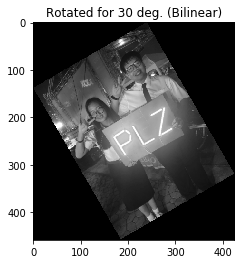

In [8]:
image = image.astype(np.float64)

for x in range(0,output_size[0]):
    for y in range(0,output_size[1]):
        #backward mapping to find original coordinates
        current_xy = np.array(([x+output_offset_x],[y+output_offset_y]))
        original_xy = np.matmul(TB,current_xy)
        
        x0 = math.floor(original_xy[0])
        y0 = math.floor(original_xy[1])
        x1 = x0 + 1
        y1 = y0 + 1
        dx = original_xy[0] - x0
        dy = original_xy[1] - y0
            
#         #zero-order interpolation
#         if original_xy[0] <= 0 or original_xy[1] <= 0 or original_xy[0] >= math.floor(image_size[0]) or original_xy[1] >= math.floor(image_size[1]):
#             output_zo[x][y] = 0
#         else:
#             output_zo[x][y] = image[x0][y0]
        
        #bilinear interpolation
        if original_xy[0] < 0 or original_xy[1] < 0 or original_xy[0] >= math.floor(image_size[0])-1 or original_xy[1] >= math.floor(image_size[1])-1:
            output_bi[x][y] = 0
        else:
            output_bi[x][y] = (image[x0][y0] + (image[x1][y0] - image[x0][y0])*dx + (image[x0][y1] - image[x0][y0])*dy + ((image[x0][y0]+image[x1][y1])-(image[x1][y0]+image[x0][y1]))*dx*dy)
#             if(x in range(200,300) and y in range(200,300)):
#                 print('-------------------------------------------')
#                 print('1', image[x0][y0])
#                 print('2', (image[x1][y0] - image[x0][y0])*dx)
#                 print('3',  (image[x0][y1] - image[x0][y0])*dy)
#                 print('4', ((image[x0][y0]+image[x1][y1])-(image[x1][y0]+image[x0][y1]))*dx*dy)
#                 print('x : ',x)
#                 print('y : ',y)
#                 print('original x : ',original_xy[0])
#                 print('original y : ',original_xy[1])
#                 print('image[x0,y0] : ',image[x0][y0])
#                 print('image[x1,y0] : ',image[x1][y0])
#                 print('image[x0,y1] : ',image[x0][y1])
#                 print('image[x1,y1] : ',image[x1][y1])
#                 print('dx : ',dx)
#                 print('dy : ',dy)
#                 print('output_bi[x,y] : ',output_bi[x][y])

output_bi = output_bi.astype(np.uint8)
print('output_bi[x,y] (uint8) : ',output_bi[200][200])
plt.figure(1)
plt.title('Original Image')
plt.imshow(image,'gray')

# plt.figure(2)
# plt.subplot(1,2,1)
# plt.title('Rotated for %d deg. (Zero-order)' % zeta)
# plt.imshow(output_zo,'gray')
# cv2.imwrite('out_zo.jpg',output_zo)

# plt.subplot(1,2,2)
plt.title('Rotated for %d deg. (Bilinear)' % zeta)
plt.imshow(output_bi,'gray')
cv2.imwrite('out_bi.jpg',output_bi)